In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from typing import Callable
from typing import Dict
from io import StringIO

<center>Group Aggregation (Split Apply Combine)</center>

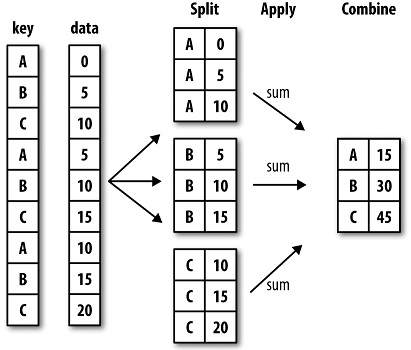

In [2]:
# Example Split Combine Apply
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})
print(df, '\n')

# Compute mean of 'data1' column using labels from 'key1' using 'groupby()'
grouped = df['data1'].groupby(df['key1'])
print(grouped.mean(), '\n') # Compute mean on group by calling '.mean()'

means = df['data1'].groupby([df['key1'], df['key2']]).mean()
print(means, '\n') # Group using multiple columns and compute the mean
print(means.unstack(), '\n')

# Grouping can use any series as long as they are the same length
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
print(df['data1'].groupby([states, years]).mean(), '\n')

# Grouping from DataFrame using existing data
print(df.groupby('key1').mean(), '\n')
print(df.groupby(['key1', 'key2']).mean(), '\n')
# Used to check for missing data since it will be excluded and affect size
print(df.groupby(['key1', 'key2']).size()) # Helper method '.size()'

  key1 key2     data1     data2
0    a  one  0.909783 -0.269160
1    a  two  0.379862  0.444253
2    b  one  1.818111 -0.784599
3    b  two  0.338135  0.480674
4    a  one  0.202906 -1.152439 

key1
a    0.497517
b    1.078123
Name: data1, dtype: float64 

key1  key2
a     one     0.556344
      two     0.379862
b     one     1.818111
      two     0.338135
Name: data1, dtype: float64 

key2       one       two
key1                    
a     0.556344  0.379862
b     1.818111  0.338135 

California  2005    0.379862
            2006    1.818111
Ohio        2005    0.623959
            2006    0.202906
Name: data1, dtype: float64 

         data1     data2
key1                    
a     0.497517 -0.325782
b     1.078123 -0.151962 

              data1     data2
key1 key2                    
a    one   0.556344 -0.710800
     two   0.379862  0.444253
b    one   1.818111 -0.784599
     two   0.338135  0.480674 

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dty

In [3]:
# Group iteration
for name, group in df.groupby('key1'): # single key
    print(name)
    print(group)
print()
    
for (k1, k2), group in df.groupby(['key1', 'key2']): # multiple keys
    print((k1, k2))
    print(group)
print()

# group to a dict and combine into one line    
pieces = dict(list(df.groupby('key1'))) 
print(pieces['b'], '\n') # show 'b' information from dict

# group by columns
grouped = df.groupby(df.dtypes, axis = 1)
for dtype, group in grouped:
    print(dtype)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.909783 -0.269160
1    a  two  0.379862  0.444253
4    a  one  0.202906 -1.152439
b
  key1 key2     data1     data2
2    b  one  1.818111 -0.784599
3    b  two  0.338135  0.480674

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.909783 -0.269160
4    a  one  0.202906 -1.152439
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.379862  0.444253
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.818111 -0.784599
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.338135  0.480674

  key1 key2     data1     data2
2    b  one  1.818111 -0.784599
3    b  two  0.338135  0.480674 

float64
      data1     data2
0  0.909783 -0.269160
1  0.379862  0.444253
2  1.818111 -0.784599
3  0.338135  0.480674
4  0.202906 -1.152439
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [4]:
# Column selection and subsets
print(df, '\n')
# index a groupby() object from a column name in a DataFrame
df.groupby('key1')['data1'].mean() # is equivalent to
print(df['data1'].groupby(df['key1']).mean(), '\n')

df.groupby('key1')[['data2']].mean() # is equivalent to
print(df[['data2']].groupby(df['key1']).mean(), '\n')

# Compute means for 'data2' column only
print(df.groupby(['key1', 'key2'])[['data2']].mean(), '\n')

# Returned object of one column is a grouped series
s_grouped = df.groupby(['key1', 'key2'])['data2']
print(s_grouped.mean())
s_grouped

  key1 key2     data1     data2
0    a  one  0.909783 -0.269160
1    a  two  0.379862  0.444253
2    b  one  1.818111 -0.784599
3    b  two  0.338135  0.480674
4    a  one  0.202906 -1.152439 

key1
a    0.497517
b    1.078123
Name: data1, dtype: float64 

         data2
key1          
a    -0.325782
b    -0.151962 

              data2
key1 key2          
a    one  -0.710800
     two   0.444253
b    one  -0.784599
     two   0.480674 

key1  key2
a     one    -0.710800
      two     0.444253
b     one    -0.784599
      two     0.480674
Name: data2, dtype: float64


In [5]:
# Grouped Dicts and Series
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
print(people, '\n')
people.iloc[2:3, [1, 2]] = np.nan # Creating missing data
print(people, '\n')

# create template for grouping columns
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

by_column = people.groupby(mapping, axis = 1) # mapping using DataFrame
print(by_column.sum(), '\n')  # Note: unused keys ('f') are ok.

map_series = pd.Series(mapping) # mapping using Series
print(map_series, '\n')
print(people.groupby(map_series, axis = 1).count())

               a         b         c         d         e
Joe     1.492425  0.417188 -1.394093 -0.020673  0.920496
Steve   0.130462 -0.113798 -0.708522 -0.722170 -2.020507
Wes     0.551512 -1.052291 -0.144938  1.355849 -0.082228
Jim    -0.423497  0.201802 -0.064945 -0.538156  0.631568
Travis -0.746544 -0.654308 -0.291684 -0.449426 -0.043853 

               a         b         c         d         e
Joe     1.492425  0.417188 -1.394093 -0.020673  0.920496
Steve   0.130462 -0.113798 -0.708522 -0.722170 -2.020507
Wes     0.551512       NaN       NaN  1.355849 -0.082228
Jim    -0.423497  0.201802 -0.064945 -0.538156  0.631568
Travis -0.746544 -0.654308 -0.291684 -0.449426 -0.043853 

            blue       red
Joe    -1.414766  2.830109
Steve  -1.430693 -2.003843
Wes     1.355849  0.469285
Jim    -0.603102  0.409873
Travis -0.741110 -1.444705 

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object 

        blue  red
Joe        2    3
Steve      2    3
Wes   

In [6]:
# Using functions to Group
print(people, '\n')
# Group by length of the names and sum their values
print(people.groupby(len).sum(), '\n') 

# Mixing data structures in 'groupby()'
key_list = ['one', 'one', 'one', 'two', 'two']
print(people.groupby([len, key_list]).min(), '\n')

# Group by index level using '.MultiIndex.from_arrays()'
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)
print(hier_df, '\n')
# Group by column on level of 'cty' or level '0'
print(hier_df.groupby(level = 'cty', axis = 1).count())

               a         b         c         d         e
Joe     1.492425  0.417188 -1.394093 -0.020673  0.920496
Steve   0.130462 -0.113798 -0.708522 -0.722170 -2.020507
Wes     0.551512       NaN       NaN  1.355849 -0.082228
Jim    -0.423497  0.201802 -0.064945 -0.538156  0.631568
Travis -0.746544 -0.654308 -0.291684 -0.449426 -0.043853 

          a         b         c         d         e
3  1.620441  0.618990 -1.459038  0.797020  1.469836
5  0.130462 -0.113798 -0.708522 -0.722170 -2.020507
6 -0.746544 -0.654308 -0.291684 -0.449426 -0.043853 

              a         b         c         d         e
3 one  0.551512  0.417188 -1.394093 -0.020673 -0.082228
  two -0.423497  0.201802 -0.064945 -0.538156  0.631568
5 one  0.130462 -0.113798 -0.708522 -0.722170 -2.020507
6 two -0.746544 -0.654308 -0.291684 -0.449426 -0.043853 

cty          US                            JP          
tenor         1         3         5         1         3
0      0.137030  0.937442 -0.239300  0.790060 -1.249

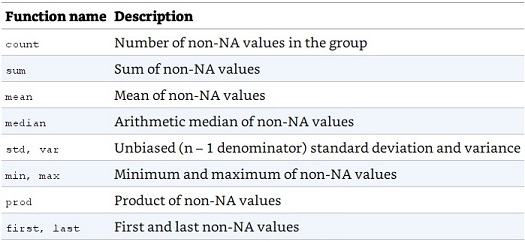
<center>Common groupby() methods use in Data Aggregation</center

In [7]:
# Data Aggregation - Create scalar values from arrays
print(df, '\n')
grouped = df.groupby('key1')
print(grouped['data1'].quantile(0.9))

  key1 key2     data1     data2
0    a  one  0.909783 -0.269160
1    a  two  0.379862  0.444253
2    b  one  1.818111 -0.784599
3    b  two  0.338135  0.480674
4    a  one  0.202906 -1.152439 

key1
a    0.803799
b    1.670114
Name: data1, dtype: float64


In [8]:
# define custom function
def peak_to_peak(arr: Callable) -> float:
    return arr.max() - arr.min()

In [9]:
print(grouped.agg(peak_to_peak)) # Use custom function
grouped.describe()               # use '.describe()' function

         data1     data2
key1                    
a     0.706877  1.596692
b     1.479977  1.265273


data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.497517  0.367832  0.202906  0.291384  0.379862  0.644822   
b      2.0  1.078123  1.046502  0.338135  0.708129  1.078123  1.448117   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.909783   3.0 -0.325782  0.799851 -1.152439 -0.710800 -0.269160   
b     1.818111   2.0 -0.151962  0.894683 -0.784599 -0.468281 -0.151962   

                          
           75%       max  
key1                      
a     0.087546  0.444253  
b     0.164356  0.480674

In [10]:
# Applying multiple functions
tips = pd.read_csv('examples/tips.csv') # load dataset
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # add tip percentage column
print(tips[:6], '\n')

grouped = tips.groupby(['day', 'smoker']) # group by 'day' and 'smoker'
grouped_pct = grouped['tip_pct']
print(grouped_pct.agg('mean'), '\n') # return aggregate using 'mean' function
# return aggregates using 'mean', 'std' and custom functions
print(grouped_pct.agg(['mean', 'std', peak_to_peak]), '\n')
# Provide custom column names for each function
print(grouped_pct.agg([('foo', 'mean'), ('bar', np.std)]), '\n') #np.std = 'std'

# Specify different functions per columns of a DataFrame
functions = ['count', 'mean', 'max'] # define function template

# Apply same three functions for 'tip_pct' and 'total_bill'
results = grouped['tip_pct', 'total_bill'].agg(functions)
print(results, '\n')
# Specifying custom names for each function as a list of tuples
ftuples = [('Nauvoo', 'mean'), ('Behemoth', np.var), ('Medina', 'max')]
print(grouped['tip_pct', 'total_bill'].agg(ftuples), '\n')

# Apply different functions per columns using a dict
print(grouped.agg({'tip': np.max, 'size' : 'sum'}), '\n')
print(grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
                   'size' : 'sum'}), '\n')

# To disable row indexes, use the '.groupby()' 'as_index=False' argument
# This is more efficent than using '.reset_index()' method
print(tips.groupby(['day', 'smoker'], as_index = False).mean())

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
5       25.29  4.71     No  Sun  Dinner     4  0.186240 

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64 

                 mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.

In [11]:
# apply() - performs entire split-apply-combine
# Function to sort tips and return last 6 rows specified by 'column'
def top(df: pd.DataFrame, n: int = 5, column: str = 'tip_pct') -> pd.DataFrame:
    return df.sort_values(by = column)[-n:]

In [12]:
print(top(tips, n = 6)) # Select 6 rows with largest values in column 'tip_pct'
# Select 6 rows in each group 'smoker' with largest values in column 'tip_pct'
print('\n',tips.groupby('smoker').apply(top))
# To remove hierarchical index use 'group_keys = False'
print('\n',tips.groupby('smoker', group_keys = False).apply(top))
# Get row in groups 'smoker' then 'day' w/ largest value in column 'total_bill'
print(tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill'))

     total_bill   tip smoker  day    time  size   tip_pct
109       14.31  4.00    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39     No  Sat  Dinner     2  0.291990
67         3.07  1.00    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Yes  Sun  Dinner     2  0.710345

             total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.28053

In [13]:
# Special Note on describe:
result = tips.groupby('smoker')['tip_pct'].describe()
print(result, '\n')
print(result.unstack('smoker'), '\n')

# inside groupby, 'describe()' method is a shortcut for:
f = lambda x: x.describe()
grouped.apply(f)

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345   

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64 



total_bill        tip       size    tip_pct
day  smoker                                                   
Fri  No     count    4.000000   4.000000   4.000000   4.000000
            mean    18.420000   2.812500   2.250000   0.151650
            std      5.059282   0.898494   0.500000   0.028123
            min     12.460000   1.500000   2.000000   0.120385
            25%     15.100000   2.625000   2.000000   0.137239
            50%     19.235000   3.125000   2.000000   0.149241
            75%     22.555000   3.312500   2.250000   0.163652
            max     22.750000   3.500000   3.000000   0.187735
     Yes    count   15.000000  15.000000  15.000000  15.000000
            mean    16.813333   2.714000   2.066667   0.174783
            std      9.086388   1.077668   0.593617   0.051293
            min      5.750000   1.000000   1.000000   0.103555
            25%     11.690000   1.960000   2.000000   0.133739
            50%     13.420000   2.500000   2.000000   0.173913
            75%     18.665000   3.240000   2.000000   0.209240
            max     40.170000   4.730000   4.000000   0.263480
Sat  No     count   45.000000  45.000000  45.000000  45.000000
            mean    19.661778   3.102889   2.555556   0.158048
            std      8.939181   1.642088   0.784960   0.039767
            min      7.250000   1.000000   1.000000   0.056797
            25%     14.730000   2.010000   2.000000   0.136240
            50%     17.820000   2.750000   2.000000   0.150152
            75%     20.650000   3.390000   3.000000   0.183915
            max     48.330000   9.000000   4.000000   0.291990
     Yes    count   42.000000  42.000000  42.000000  42.000000
            mean    21.276667   2.875476   2.476190   0.147906
            std     10.069138   1.630580   0.862161   0.061375
            min      3.070000   1.000000   1.000000   0.035638
            25%     13.405000   2.000000   2.000000   0.091797
            50%     20.390000   2.690000   2.000000   0.153624
...                       ...        ...        ...        ...
Sun  No     std      8.130189   1.224785   1.032674   0.042347
            min      8.770000   1.010000   2.000000   0.059447
            25%     14.780000   2.000000   2.000000   0.139780
            50%     18.430000   3.020000   3.000000   0.161665
            75%     25.000000   3.920000   4.000000   0.185185
            max     48.170000   6.000000   6.000000   0.252672
     Yes    count   19.000000  19.000000  19.000000  19.000000
            mean    24.120000   3.516842   2.578947   0.187250
            std     10.442511   1.261151   0.901591   0.154134
            min      7.250000   1.500000   2.000000   0.065660
            25%     17.165000   3.000000   2.000000   0.097723
            50%     23.100000   3.500000   2.000000   0.138122
            75%     32.375000   4.000000   3.000000   0.215325
            max     45.350000   6.500000   5.000000   0.710345
Thur No     count   45.000000  45.000000  45.000000  45.000000
            mean    17.113111   2.673778   2.488889   0.160298
            std      7.721728   1.282964   1.179796   0.038774
            min      7.510000   1.250000   1.000000   0.072961
            25%     11.690000   1.800000   2.000000   0.137741
            50%     15.950000   2.180000   2.000000   0.153492
            75%     20.270000   3.000000   2.000000   0.184843
            max     41.190000   6.700000   6.000000   0.266312
     Yes    count   17.000000  17.000000  17.000000  17.000000
            mean    19.190588   3.030000   2.352941   0.163863
            std      8.355149   1.113491   0.701888   0.039389
            min     10.340000   2.000000   2.000000   0.090014
            25%     13.510000   2.000000   2.000000   0.148038
            50%     16.470000   2.560000   2.000000   0.153846
            75%     19.810000   4.000000   2.000000   0.194837
            max     43.110000   5.000000   4.000000   0.241255

[64 rows x 4 columns]

In [14]:
# Perform Quantile and Bucketing operations using 'cut()' and 'qcut()'
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4) # split into quarters
print(quartiles[:10]) # same as 'print(quartiles.head(10), '\n')'

0      (0.132, 1.768]
1     (-1.504, 0.132]
2    (-3.147, -1.504]
3     (-1.504, 0.132]
4     (-1.504, 0.132]
5     (-1.504, 0.132]
6     (-1.504, 0.132]
7      (0.132, 1.768]
8     (-1.504, 0.132]
9     (-1.504, 0.132]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.147, -1.504] < (-1.504, 0.132] < (0.132, 1.768] < (1.768, 3.404]]


In [15]:
def get_stats(group: pd.Series) -> Dict:    
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [16]:
grouped = frame.data2.groupby(quartiles) # Compute some stastics on quartiles
print(grouped.apply(get_stats).unstack(), '\n') # print equal-length buckets

# To use equal-size buckets based on sample quantiles. use '.qcut()'
grouping = pd.qcut(frame.data1, 10, labels=False) # labels=false to get numbers
grouped = frame.data2.groupby(grouping)
print(grouped.apply(get_stats).unstack())

                  count       max      mean       min
data1                                                
(-3.147, -1.504]   67.0  1.745058 -0.225151 -2.738998
(-1.504, 0.132]   488.0  2.571834  0.087487 -3.170679
(0.132, 1.768]    417.0  2.466056  0.014689 -2.211694
(1.768, 3.404]     28.0  2.174468  0.187506 -1.994962 

       count       max      mean       min
data1                                     
0      100.0  2.183386 -0.110998 -2.738998
1      100.0  2.311799 -0.021054 -2.583605
2      100.0  2.179787  0.054922 -2.444050
3      100.0  2.571834  0.197558 -1.893194
4      100.0  2.056384  0.111966 -3.170679
5      100.0  2.469719  0.069975 -1.888893
6      100.0  2.181343 -0.000555 -2.211694
7      100.0  2.138531  0.007717 -1.709477
8      100.0  2.466056  0.013033 -2.059244
9      100.0  2.174468  0.067273 -2.146052


In [17]:
# Cleaning missing data or replacing data
s = pd.Series(np.random.randn(6))
s[::2] = np.nan # create missing data
print(s, '\n')
print(s.fillna(s.mean()), '\n') # replace missing data with the 'mean()'

# Fill using unique data by group
states = ['Ohio', 'New York', 'Vermont', 'Florida', 
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index = states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan  # Create missing values
print(data, '\n')
print(data.groupby(group_key).mean(), '\n') # Show mean of grouped data

fill_mean = lambda g: g.fillna(g.mean()) # replace mssing data with '.mean()'
# replace missing data of each group with the group mean
print(data.groupby(group_key).apply(fill_mean), '\n') 
# Example to replace missing data using group name
fill_values = {'East': 0.5, 'West': -1} # define mapping
fill_func = lambda g: g.fillna(fill_values[g.name]) # replace with '.name()'
print(data.groupby(group_key).apply(fill_func))

0         NaN
1    0.534964
2         NaN
3   -2.087109
4         NaN
5    1.014707
dtype: float64 

0   -0.179146
1    0.534964
2   -0.179146
3   -2.087109
4   -0.179146
5    1.014707
dtype: float64 

Ohio          0.023792
New York     -0.114603
Vermont            NaN
Florida      -1.794088
Oregon        1.588840
Nevada             NaN
California   -1.318766
Idaho              NaN
dtype: float64 

East   -0.628300
West    0.135037
dtype: float64 

Ohio          0.023792
New York     -0.114603
Vermont      -0.628300
Florida      -1.794088
Oregon        1.588840
Nevada        0.135037
California   -1.318766
Idaho         0.135037
dtype: float64 

Ohio          0.023792
New York     -0.114603
Vermont       0.500000
Florida      -1.794088
Oregon        1.588840
Nevada       -1.000000
California   -1.318766
Idaho        -1.000000
dtype: float64


In [18]:
# Random sampling and permutation
suits = ['H', 'S', 'C', 'D']   # Create deck of cards dataset
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []

for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index = cards)
print(deck[:13], len(deck))

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64 52


In [19]:
# Function to draw and return 'n' cards from a deck
def draw(deck: object, n: int = 5) -> object:
    return deck.sample(n)

In [20]:
print(draw(deck), '\n') # draw 5 cards

get_suit = lambda card: card[-1] # last character is the suit
# Group cards by suit, draw 2 random cards from each suit and remove index
print(deck.groupby(get_suit, group_keys = False).apply(draw, n = 2), '\n')

# Example: Compute group weighted average
df = pd.DataFrame({'category': ['a'] * 4 + ['b'] * 4, # dataset contains 'keys'
                   'data': np.random.randn(8),        # 'values' and
                   'weights': np.random.rand(8)})     # 'weights'
print(df, '\n')

grouped = df.groupby('category') # Compute group weighted average by 'category'
# Function to compute weighted average
get_wavg = lambda g: np.average(g['data'], weights = g['weights']) 
print(grouped.apply(get_wavg))

3D     3
9H     9
4C     4
JD    10
AH     1
dtype: int64 

6C     6
QC    10
4D     4
QD    10
3H     3
QH    10
KS    10
4S     4
dtype: int64 

  category      data   weights
0        a  0.102242  0.209675
1        a -0.777332  0.298573
2        a  0.473840  0.040674
3        a -0.649386  0.555728
4        b -0.815201  0.530973
5        b -0.317467  0.561545
6        b -0.846412  0.889592
7        b  0.431940  0.284928 

category
a   -0.499943
b   -0.547415
dtype: float64


In [21]:
# Correlations
# Compute columnar correlations
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
print(close_px.info(), '\n')
print(close_px[-4:], '\n') # show last four rows

# Compute yearly correlations of daily returns with 'SPX'
# function to compute pairwise correlation of each column with 'SPX'
spx_corr = lambda x: x.corrwith(x['SPX'])
# Compute percent change on 'close_px' with 'pct_change' and replace
rets = close_px.pct_change().dropna()

get_year = lambda x: x.year      # function to extract year from datetime label
by_year = rets.groupby(get_year)       # Group percent changes by year
print(by_year.apply(spx_corr), '\n')   # Apply pairwise correlation

# Compute inter-column correlation with an embedded function
print(by_year.apply(lambda g: g['AAPL'].corr(g['MSFT'])))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB
None 

              AAPL   MSFT    XOM      SPX
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58 

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0 

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0

In [22]:
# Group-wise linear regression using ordinary least squares (OLS)
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [23]:
print(by_year.apply(regress, 'AAPL', ['SPX']))

           SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514


In [24]:
# Data Summarization i.e. Pivot Tables using .pivot_table() method or function
print(tips.head(), '\n')
print(tips.pivot_table(index = ['day', 'smoker']), '\n') # Tips dataset

# Aggregate tip_pct, size & group by time with day in row and smoker in column
print(tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], 
                       columns = 'smoker'), '\n')

# Display partial totals using 'margins = true' to sum row and column labels
print(tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'],
                       columns = 'smoker', margins = True), '\n')

# Display partial totals using specified aggregation function 'len()'
print(tips.pivot_table('tip_pct', index = ['time', 'smoker'],
                       columns = 'day', aggfunc = len, margins = True), '\n')

# Fill in missing data using 'fill_value=' argument
print(tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                       columns='day', aggfunc='mean', fill_value=0))

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808 

                 size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588 

                 size             tip_pct          
smoker             No       Yes        No       Yes
time   day      

<center>'pivot_table()' Arguments</center>

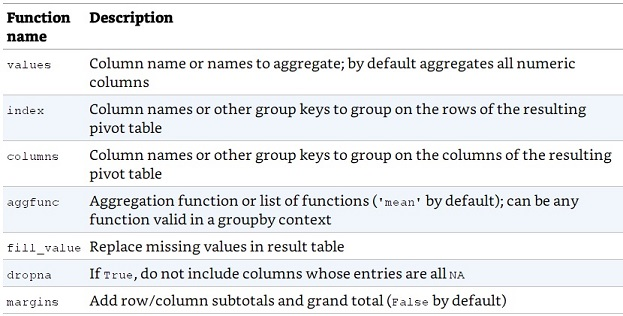

In [25]:
# Compute group frequencies. i.e.Cross-Tabulations: Crosstab
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_csv(StringIO(data), sep = '\s+')
print(data, '\n')

# Sumarize by nationality and handedness using '.crosstab()'
print(pd.crosstab(data.Nationality, data.Handedness, margins = True), '\n')
# '.crosstab()' using a Series
print(pd.crosstab([tips.time, tips.day], tips.smoker, margins = True))

   Sample Nationality    Handedness
0       1         USA  Right-handed
1       2       Japan   Left-handed
2       3         USA  Right-handed
3       4       Japan  Right-handed
4       5       Japan   Left-handed
5       6       Japan  Right-handed
6       7         USA  Right-handed
7       8         USA   Left-handed
8       9       Japan  Right-handed
9      10         USA  Right-handed 

Handedness   Left-handed  Right-handed  All
Nationality                                
Japan                  2             3    5
USA                    1             4    5
All                    3             7   10 

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244
